# Weather Model for Taxi Availability EDA

In this notebook we will download data via the APIs from NEA, and create a prototype dataset.

# Preamble

Get the packages ready

In [12]:
import requests
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import itertools

# Key Variables

Declare key variables here

In [13]:
query="2022-04-26T20:00:00"

## Define functions

Write the functions to pull data from the APIs

In [14]:
def get_weather_data(query:str):
    '''Returns dictionary of JSON objects for weather data given a datetime string
    Each entry in the dictionary is the JSON response for each of the API Endpoints of
     ["air-temperature","rainfall","relative-humidity"]    
    '''
    data_sets = ["air-temperature","rainfall","relative-humidity"]
    results={}
    for measure in data_sets:
        URL = "https://api.data.gov.sg/v1/environment/"+measure
        params={'date_time':query}
        r=requests.get(URL,params=params)
        results[measure]=r.json()
    return results

def get_taxi_data(query:str):
    '''Returns the coordinates of all taxis via the LTA API endpoint for a given datetime string
    '''
    URL = "https://api.data.gov.sg/v1/transport/taxi-availability"
    params={'date_time':query}
    r=requests.get(URL,params=params)
    return r.json()

# Retrieving Single Timestamp Data

This section deals with downloading the data and creating the dataset

We create `numpy` arrays for the coordinates for each taxi and weather station, calculate the Euclidean Distance from each taxi to the weather station, and then assign that taxi to the nearest weather station.

We then calculate the number of taxis available for each weather station.

In [15]:
weather_data=get_weather_data(query=query)
taxi_data=get_taxi_data(query=query)

In [16]:
taxi_coordinates = taxi_data['features'][0]['geometry']['coordinates']
station_dict = weather_data['air-temperature']['metadata']['stations']
taxi_array = np.array([t[::-1] for t in taxi_coordinates]) # taxi_coordinates are reversed, need to fix
station_array = np.array([[station_dict[i]['location']['latitude'],station_dict[i]['location']['longitude']] for i in range(len(station_dict))])

## Taxi Scatterplot

Here's how the distribution of taxis looks like at the specified timestamp

Text(0.5, 1.0, 'Taxi Availability 2022-04-26T20:00:00')

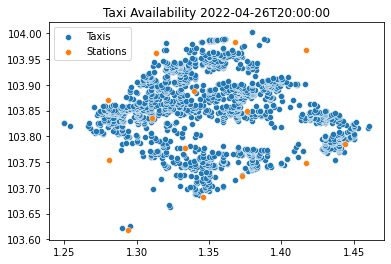

In [33]:
sns.scatterplot(x=taxi_array[:,0],y=taxi_array[:,1])
sns.scatterplot(x=station_array[:,0],y=station_array[:,1])
plt.legend(labels=['Taxis','Stations'])
plt.title(f"Taxi Availability {query}")

## Taxi Assignment

Assign each taxi to the nearest weather station by Euclidean Distance

In [34]:
cartesian_prod = itertools.product(taxi_array,station_array) # Cartesian product for taxi and weather station coordinates
diff = np.array([i[0]-i[1] for i in cartesian_prod]) 
distance = np.linalg.norm(diff,axis=1)
distance_matrix = distance.reshape((len(taxi_array),len(station_array),-1)) # Reshape back into distances since the cartesian product only has one dimension
assignment = [np.argmin(distance_matrix[i]) for i in range(len(taxi_array))]

## Assignment Breakdown by Station

Visualizing the number of taxis assigned to each weather station at the pre-determined timestamp

**TODO: Join with the next section**

Text(0.5, 1.0, 'Taxi availability 2022-04-26T20:00:00')

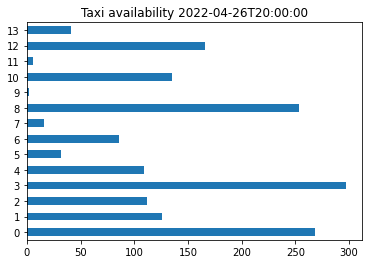

In [46]:

assignment_series = pd.Series(assignment)
assignment_series.value_counts().sort_index().plot(kind='barh')
plt.title(f"Taxi availability {query}")

# Weather Data

In this section, we need to create the dataframe for the actual weather data by station

In [20]:
print(weather_data['air-temperature']['metadata'])
print(weather_data['air-temperature']['items'])
print(weather_data['air-temperature']['api_info'])

{'stations': [{'id': 'S109', 'device_id': 'S109', 'name': 'Ang Mo Kio Avenue 5', 'location': {'latitude': 1.3764, 'longitude': 103.8492}}, {'id': 'S50', 'device_id': 'S50', 'name': 'Clementi Road', 'location': {'latitude': 1.3337, 'longitude': 103.7768}}, {'id': 'S107', 'device_id': 'S107', 'name': 'East Coast Parkway', 'location': {'latitude': 1.3135, 'longitude': 103.9625}}, {'id': 'S43', 'device_id': 'S43', 'name': 'Kim Chuan Road', 'location': {'latitude': 1.3399, 'longitude': 103.8878}}, {'id': 'S108', 'device_id': 'S108', 'name': 'Marina Gardens Drive', 'location': {'latitude': 1.2799, 'longitude': 103.8703}}, {'id': 'S44', 'device_id': 'S44', 'name': 'Nanyang Avenue', 'location': {'latitude': 1.34583, 'longitude': 103.68166}}, {'id': 'S121', 'device_id': 'S121', 'name': 'Old Choa Chu Kang Road', 'location': {'latitude': 1.37288, 'longitude': 103.72244}}, {'id': 'S106', 'device_id': 'S106', 'name': 'Pulau Ubin', 'location': {'latitude': 1.4168, 'longitude': 103.9673}}, {'id': 'S1

In [21]:
weather_data['rainfall']

{'metadata': {'stations': [{'id': 'S77',
    'device_id': 'S77',
    'name': 'Alexandra Road',
    'location': {'latitude': 1.2937, 'longitude': 103.8125}},
   {'id': 'S109',
    'device_id': 'S109',
    'name': 'Ang Mo Kio Avenue 5',
    'location': {'latitude': 1.3764, 'longitude': 103.8492}},
   {'id': 'S90',
    'device_id': 'S90',
    'name': 'Bukit Timah Road',
    'location': {'latitude': 1.3191, 'longitude': 103.8191}},
   {'id': 'S114',
    'device_id': 'S114',
    'name': 'Choa Chu Kang Avenue 4',
    'location': {'latitude': 1.38, 'longitude': 103.73}},
   {'id': 'S50',
    'device_id': 'S50',
    'name': 'Clementi Road',
    'location': {'latitude': 1.3337, 'longitude': 103.7768}},
   {'id': 'S107',
    'device_id': 'S107',
    'name': 'East Coast Parkway',
    'location': {'latitude': 1.3135, 'longitude': 103.9625}},
   {'id': 'S215',
    'device_id': 'S215',
    'name': 'GEYLANG EAST CENTRAL',
    'location': {'latitude': 1.32785, 'longitude': 103.88899}},
   {'id': 'S118

In [22]:
weather_data['relative-humidity']

{'metadata': {'stations': [{'id': 'S109',
    'device_id': 'S109',
    'name': 'Ang Mo Kio Avenue 5',
    'location': {'latitude': 1.3764, 'longitude': 103.8492}},
   {'id': 'S50',
    'device_id': 'S50',
    'name': 'Clementi Road',
    'location': {'latitude': 1.3337, 'longitude': 103.7768}},
   {'id': 'S107',
    'device_id': 'S107',
    'name': 'East Coast Parkway',
    'location': {'latitude': 1.3135, 'longitude': 103.9625}},
   {'id': 'S43',
    'device_id': 'S43',
    'name': 'Kim Chuan Road',
    'location': {'latitude': 1.3399, 'longitude': 103.8878}},
   {'id': 'S108',
    'device_id': 'S108',
    'name': 'Marina Gardens Drive',
    'location': {'latitude': 1.2799, 'longitude': 103.8703}},
   {'id': 'S44',
    'device_id': 'S44',
    'name': 'Nanyang Avenue',
    'location': {'latitude': 1.34583, 'longitude': 103.68166}},
   {'id': 'S121',
    'device_id': 'S121',
    'name': 'Old Choa Chu Kang Road',
    'location': {'latitude': 1.37288, 'longitude': 103.72244}},
   {'id': '

# Modeling

**REQUIRED: DataFrame with weather data by station and corresponding number of taxis**

Try different time lag for forecasting availability. 1 min, 15 min, 30 min etc.

# Serving Prediction

TODO: Decide on what we are trying to predict